## Random Forest Classification

First try:
- Run on 2 labels
- Accuracy on validation: 0.77

Second try:
- Run on 4 labels
- Accuracy on validation: 0.53

Other notes:
- Company type seems to not be that important

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def load_json(path):
    with open(path, 'r') as file:
        data = json.load(file)
    return data

In [29]:
json_path = "train_V3.jsonl"
train_data = load_json(json_path)

In [30]:
json_path = "validation_V3.jsonl"
validation_data = load_json(json_path)

In [31]:
json_path = "four_labels_clustering_result.json"
clustered_data = load_json(json_path)

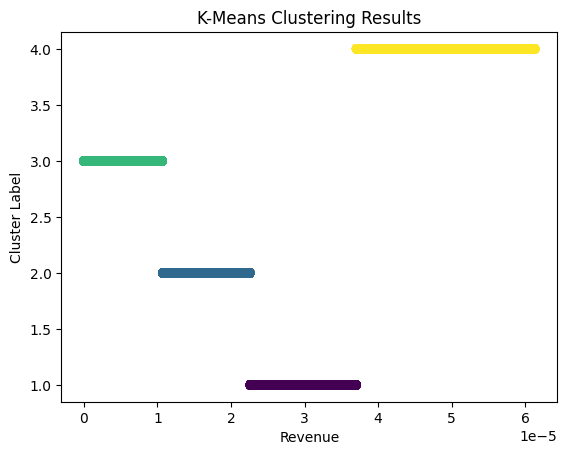

In [32]:
#View clusters 

import matplotlib.pyplot as plt

revenue_values = [data['revenue'] for data in clustered_data.values()]
label_values = [data['label'] for data in clustered_data.values()]

plt.scatter(revenue_values, label_values, c=label_values, cmap='viridis')
plt.xlabel('Revenue')
plt.ylabel('Cluster Label')
plt.title('K-Means Clustering Results')
plt.show()

In [33]:
#Soleadify_id column was missing

df_clustered_data = pd.DataFrame(clustered_data).T.reset_index()
df_clustered_data.columns = ['soleadify_id', 'estimated_revenue', 'label']

In [34]:
df_clustered_data

,soleadify_id,estimated_revenue,label
0,8ce226f2-93e4-11eb-8859-29e7c34dee35,0.000013,2.0
1,f0dfafb5-93e4-11eb-8e19-198fb02d6f96,0.000060,4.0
2,33f54d00-93e5-11eb-97db-273ba5953680,0.000009,3.0
3,05d76c52-93e5-11eb-aa66-9b8d95e2171b,0.000035,1.0
4,0267e810-93e5-11eb-97db-273ba5953680,0.000013,2.0
...,...,...,...
41016,3849b305-93e5-11eb-b4a6-27899be4e45d,0.000010,3.0
41017,23f2a330-93e5-11eb-b997-8dd98d09cf25,0.000007,3.0
41018,ecaf7383-93e4-11eb-be3a-7f925cb94351,0.000003,3.0
41019,04b77d63-93e5-11eb-be3a-7f925cb94351,0.000008,3.0


In [35]:
df_train_data = pd.DataFrame(train_data)
train_data = pd.merge(df_train_data, df_clustered_data[['soleadify_id', 'label']], on='soleadify_id', how='left')

In [36]:
train_data.head(5)

,soleadify_id,main_country_code,main_latitude,main_longitude,num_locations,company_type,year_founded,employee_count,estimated_revenue,long_description,business_tags,main_business_category,technologies,naics_2022,nace_rev2,ncci_codes_28_1,sic,isic_v4,ibc_insurance,label
0,980788f7-0d78-11ec-9fd1-278b36007b9d,0.953271,0.683966,0.200097,0.000000,0.0,0.979592,0.000019,0.000003,"[0.329865038394928, -0.21012070775032043, -0.0...","[0.39202553033828735, -0.11662707477807999, -0...","[0.0829884335398674, 0.0306156724691391, 0.501...","[-0.4880315661430359, -0.3718526363372803, 0.1...",0.492610,"[0.6106548747104653, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7620240480961924, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8196411709159585, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6146712514327394, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9685484783346533, 0.29415092205000565, 0.63...",3.0
1,21651a83-93e5-11eb-be5a-4f810ab55f2e,0.953271,0.683068,0.140260,0.000046,0.0,0.979592,0.000001,0.000011,"[0.712107241153717, -0.38276129961013794, -0.1...","[0.5752694606781006, -0.08183848112821579, 0.0...","[0.34350648522377014, -0.05661927908658981, -0...","[-0.6675175428390503, -0.425719290971756, 0.05...",0.507107,"[0.7053063802905875, 0.7063592335228469, 0.672...","[0.8754509018036072, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6455775889203651, 0.7126219704123387, 0.713...","[0.708346358236949, 0.6759403980410545, 0.0, 0...","[0.43907681864464304, 0.9654938341441339, 0.58...",3.0
2,2d9b5307-93e5-11eb-be3a-7f925cb94351,0.953271,0.751184,0.266252,0.000000,0.0,0.985714,0.000070,0.000009,"[-0.007623716723173857, -0.03810649365186691, ...","[0.11586173623800278, -0.015017054043710232, 0...","[0.08741243183612823, -0.0501885712146759, 0.0...","[-0.38350117206573486, -0.7189117670059204, -0...",0.528731,"[0.6411876184459886, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8822645290581163, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.773371104815864, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.6448890278211942, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9964928159294038, 0.996493947279104, 0.8256...",3.0
3,2c9a0fa8-93e5-11eb-919a-b3f9a5ad205c,0.953271,0.746951,0.258281,0.000000,0.0,0.926531,0.000004,0.000019,"[-0.13116967678070068, -0.7557323575019836, 0....","[0.009848184883594513, -0.4860638678073883, 0....","[-0.051143188029527664, -0.29401713609695435, ...","[-0.6040390133857727, -0.4824645519256592, -0....",0.553571,"[0.8442830069488313, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.010120240480961924, 0.0037074148296593187, ...","[0.0821529745042493, 0.08204805371944182, 0.0,...","[0.8458893404188809, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07071048761172079, 0.07070935626202059, 0.1...",2.0
4,24689681-93e5-11eb-919a-b3f9a5ad205c,0.953271,0.751240,0.266281,0.000000,0.0,0.936735,0.000111,0.000038,"[0.5528952479362488, -0.22069744765758514, 0.6...","[0.1232069730758667, -0.02317667566239834, 0.4...","[0.37300610542297363, -0.06451785564422607, -0...","[-0.19715151190757751, -0.6144096255302429, -0...",0.509564,"[0.6652979574647294, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8822645290581163, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7052775154758157, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6687506512451807, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7133159859712637, 0.43907681864464304, 0.58...",4.0


In [37]:
df_validation_data = pd.DataFrame(validation_data)
validation_data = pd.merge(df_validation_data, df_clustered_data[['soleadify_id', 'label']], on='soleadify_id', how='left')

In [38]:
validation_data.head(5)

,soleadify_id,main_country_code,main_latitude,main_longitude,num_locations,company_type,year_founded,employee_count,estimated_revenue,long_description,business_tags,main_business_category,technologies,naics_2022,nace_rev2,ncci_codes_28_1,sic,isic_v4,ibc_insurance,label
0,a9bd3cba-93e4-11eb-8ad6-7326edce8d21,0.953271,0.751136,0.266284,0.000000,0.0,0.928571,0.000016,0.000029,"[-0.06328043341636658, -0.015241507440805435, ...","[0.008867006748914719, 0.19864435493946075, 0....","[-0.11727969348430634, -0.04518025740981102, 0...","[-0.32219159603118896, -0.6498435139656067, 0....",0.528865,"[0.7769004000842283, 0.7705832806906716, 0.0, ...","[0.45150300601202403, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.9441821424824258, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.779201833906429, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.9962665459893653, 0.7132051137006449, 0.996...",1.0
1,3e8e757d-a119-11eb-921a-19422299a650,0.953271,0.688006,0.155360,0.000046,0.0,0.918367,0.000063,0.000015,"[-0.359954833984375, -0.18833033740520477, -0....","[-0.46814775466918945, -0.13502907752990723, 0...","[-0.09220796823501587, -0.16668562591075897, 0...","[-0.5101659893989563, -0.48322850465774536, -0...",0.250341,"[0.14750473783954515, 0.1348704990524321, 0.22...","[0.2501002004008016, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.32200188857412654, 0.2509705172594691, 0.25...","[0.14379493591747422, 0.15629884338855893, 0.2...","[0.25353546781310105, 0.18735151035184977, 0.2...",2.0
2,938f7112-93e4-11eb-8ad6-7326edce8d21,0.953271,0.770587,0.238103,0.000000,0.0,0.877551,0.000030,0.000007,"[-0.09501001983880997, -0.035809632390737534, ...","[-0.17168815433979034, -0.21880200505256653, 0...","[-0.03720657899975777, 0.13305814564228058, 0....","[-0.5661941766738892, -0.5516711473464966, -0....",0.272223,"[0.26121288692356287, 0.26194988418614445, 0.2...","[0.31462925851703405, 0.36312625250501, 0.0, 0...","[0.3620816283705802, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2695634052308013, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.39370969566693065, 0.18112908700079194, 0.8...",3.0
3,1f0f7d31-e272-11eb-ae7b-4d3617afa936,0.953271,0.688613,0.155419,0.000000,0.0,0.873469,0.000043,0.000024,"[-0.13029038906097412, -0.22123919427394867, -...","[0.39271268248558044, 0.07150959223508835, 0.1...","[0.13981175422668457, -0.07302162051200867, 0....","[-0.373003751039505, -0.7279940247535706, -0.2...",0.629114,"[0.9064013476521373, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8841683366733467, 0.8845691382765531, 0.0, ...","[0.8772426817752597, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9073668854850474, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9012343025229098, 0.9012331711732097, 0.965...",1.0
4,02bc49b8-93e5-11eb-b997-8dd98d09cf25,0.953271,0.703477,0.246332,0.000000,0.0,0.936735,0.000006,0.000010,"[0.1680947095155716, 0.37671154737472534, 0.27...","[-0.5826679468154907, -0.108555868268013, 0.29...","[-0.105366550385952, -0.33504724502563477, 0.2...","[-0.5909496545791626, -0.3934321403503418, 0.2...",0.529098,"[0.7580543272267846, 0.7581596125500105, 0.0, ...","[0.8754509018036072, 0.8822645290581163, 0.0, ...","[0.7670758577274158, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7604459726998021, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6341215069578007, 0.7132073764000453, 0.713...",3.0


In [39]:
train_data['label'].isna().sum()

4051

In [40]:
validation_data['label'].isna().sum()

456

In [41]:
train_data = train_data.dropna(subset=['label'])

In [42]:
validation_data = validation_data.dropna(subset=['label'])

In [43]:
def PrepareData(data):
    new_data = data.drop(['label', 'estimated_revenue', 'soleadify_id', 'long_description',	'business_tags', 'main_business_category', 'technologies', 'sic'], axis=1) 

    new_data['ibc_insurance'] = data['ibc_insurance'].apply(lambda x: sum(x) / len(x))
    new_data['isic_v4'] = data['isic_v4'].apply(lambda x: x[0])
    new_data['nace_rev2'] = data['nace_rev2'].apply(lambda x: sum(x) / len([i for i in x if i is not None]) if x is not None and len(x) > 0 else None)
    new_data['ncci_codes_28_1'] = data['ncci_codes_28_1'].apply(lambda x: sum(x) / len([i for i in x if i is not None]) if x is not None and len(x) > 0 else None)
    
    return new_data

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

X_train = PrepareData(train_data)

y_train = train_data['label']

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
#Validate on label prediction 

X_val= PrepareData(validation_data)
y_val_pred = random_forest_model.predict(X_val)

y_val= validation_data['label']

accuracy = random_forest_model.score(X_val, y_val)
print(f"Accuracy on Validation Set: {accuracy}")


Accuracy on Validation Set: 0.5268022181146026


In [46]:
from sklearn.metrics import classification_report

classification_report_result = classification_report(y_val, y_val_pred)

print("Classification Report:\n", classification_report_result)

Classification Report:
               precision    recall  f1-score   support

         1.0       0.52      0.41      0.46      1216
         2.0       0.47      0.62      0.53      1480
         3.0       0.58      0.64      0.60      1502
         4.0       0.62      0.31      0.41       671

    accuracy                           0.53      4869
   macro avg       0.55      0.49      0.50      4869
weighted avg       0.54      0.53      0.52      4869



In [47]:
with open('ClassificationReport_RandomForest_4labels.txt', 'w') as file:
    file.write("Classification Report with RandomForest with 4 labels:\n")
    file.write(classification_report_result)

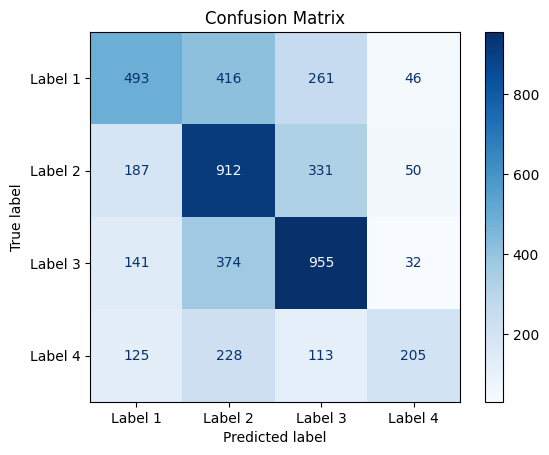

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_val, y_val_pred)

disp = ConfusionMatrixDisplay(conf_matrix,
                              display_labels=["Label 1", "Label 2", "Label 3", "Label 4"])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


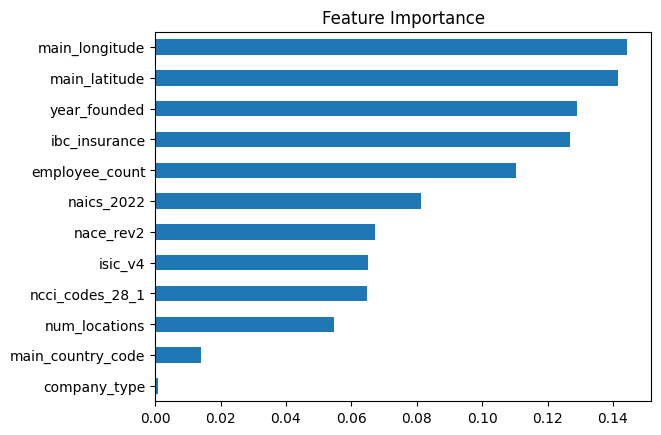

In [49]:
feature_importance = pd.Series(random_forest_model.feature_importances_, index=X_val.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()